In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
plt.style.use('ggplot')

In [34]:

df = pd.read_csv('2021MCMProblemC_DataSet.csv')
classes = ['Positive ID', 'Negative ID', 'Unverified', 'Unprocessed']
colors = [['orange', 'teal', 'tab:pink', 'tab:brown'], ['red', 'blue', 'tab:purple', 'brown']]

df_negative = df.loc[df['Lab Status'] == 'Negative ID']
# df_negative['Detection Date'] = df_negative['Detection Date'].todatetime() 
df_negative = df_negative.drop(['GlobalID', 'Lab Status', 'Lab Comments', 'Detection Date', 'Submission Date', 'Latitude'], axis=1)

In [35]:
df_negative.head()

,Notes,Longitude
6,"I’m not sure what this is, but it was the bigg...",-122.480035
8,"slow moving, i have this in the freezer still ...",-123.105188
9,It landed on my window while working. It walke...,-122.323562
12,Probably not an Asain Hornet but still a prett...,-122.057332
14,Was on the garden hose. It stung (maybe just a...,-122.439050


In [36]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_negative['Notes'])
df_negative = df_negative.drop(['Notes'], axis=1)
print(np.all(X.toarray()[0,:]) == 0)

True


In [48]:
# print(df_negative['Notes'])
# print(vectorizer.get_feature_names())

In [38]:
df_words = np.array(pd.DataFrame(X.toarray()))


In [39]:
df_negative = np.array(df_negative)
Xx = np.concatenate([df_words, df_negative], axis=1)
df = pd.DataFrame(Xx)
# df.drop(['3141'], axis=1)
# df

In [40]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-122.480035
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-123.105188
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-122.323562
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-122.057332
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-122.439050


In [41]:
scaler = RobustScaler()
X = scaler.fit_transform(df)
# print(X.shape)
# X = X[~np.isnan(X).any(axis=1)]
# X = X[np.isfinite(X).any(axis=1)]
# print(np.isinf(X)
X = np.where(np.isfinite(X), X, 0)

In [42]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=200, n_init=100)

K_cluster = kmeans.fit_predict(X)
# predictions = K_cluster.predict(X)
# df_predictions = X.assign(predictions=predictions)

In [43]:
print(K_cluster)

[0 0 0 ... 0 0 0]


In [44]:
# Calculating TSNE and PCA
print('Doing TSNE and PCA for MNIST...')
model_pca = PCA(n_components=num_clusters, random_state=42)
pca_m = model_pca.fit(X)
pca = pca_m.transform(X)

Doing TSNE and PCA for MNIST...


In [45]:
model_pca.explained_variance_ratio_

array([0.59350181, 0.10375093, 0.08065488])

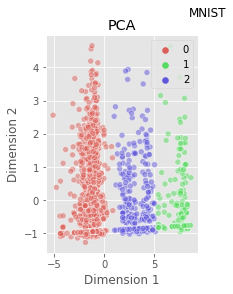

In [46]:
# Creating a plot of subplots for PCA
plt.suptitle('MNIST')
plt.subplot(1, 2, 1)
plt.title('PCA')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
sns.scatterplot(x=pca[:,0],y=pca[:,1], hue=K_cluster, palette=sns.color_palette("hls", 3), legend='full', alpha=0.5)

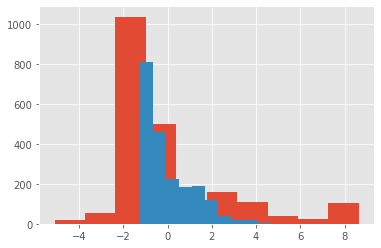

In [47]:
plt.hist(pca[:,0])
plt.hist(pca[:,1])
plt.show()